<a href="https://colab.research.google.com/github/venkat2ram/tf_cert_practice/blob/main/Fashoin_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [34]:
import math as math

In [3]:
dataset,meta_data=tfds.load('fashion_mnist',with_info=True,as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete37DPE8/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete37DPE8/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
train_data=dataset['train']
test_data=dataset['test']

In [14]:
num_train_data=meta_data.splits['train'].num_examples
num_test_data=meta_data.splits['test'].num_examples

In [47]:
meta_data

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [15]:
def normalize(image,label):
  image=tf.cast(image,tf.float32)
  image=image/255
  return image,label

In [16]:
train_data=train_data.map(normalize)
test_data=test_data.map(normalize)

In [17]:
for image,label in train_data.take(1):
  break

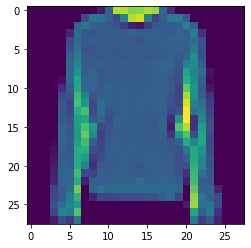

In [19]:
plt.imshow(image.numpy().reshape(28,28))

In [20]:
BATCH_SIZE=32
train_data=train_data.cache().repeat().shuffle(num_train_data).batch(BATCH_SIZE)
test_data=test_data.cache().batch(BATCH_SIZE)

In [30]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')]
)

In [31]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics='accuracy')

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [35]:
history=model.fit(train_data,epochs=5,steps_per_epoch=math.ceil(num_train_data/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4919 - accuracy: 0.8270
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3731 - accuracy: 0.8665
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3360 - accuracy: 0.8764
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3085 - accuracy: 0.8859
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2910 - accuracy: 0.8915


In [83]:
class_names=meta_data.features['label'].names

In [36]:
for im,la in test_data.take(1):
  break;

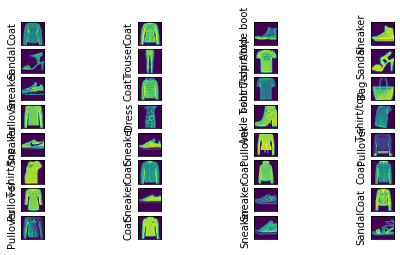

In [89]:
plt.figure(figsize=(8,4))
for a in range(32):
  x=im[a].numpy().reshape(28,28)
  plt.subplot(8,4,a+1)
  plt.xticks([])
  plt.yticks([])
  plt.ylabel(class_names[la.numpy()[a]])
  plt.grid(False)
  plt.imshow(x)

In [65]:
la1=model.predict(im)

In [93]:
la1=la1.argmax(axis=1)

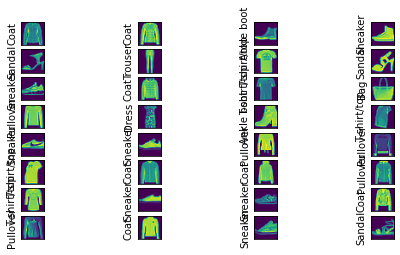

In [94]:
plt.figure(figsize=(8,4))
for a in range(32):
  x=im[a].numpy().reshape(28,28)
  plt.subplot(8,4,a+1)
  plt.xticks([])
  plt.yticks([])
  plt.ylabel(class_names[la1[a]])
  plt.grid(False)
  plt.imshow(x)

In [92]:
la1[1]

array([1.8800101e-06, 4.9627440e-09, 5.1613292e-03, 3.2556233e-08,
       8.6728388e-01, 2.4157884e-10, 1.2754966e-01, 2.8220690e-11,
       3.3303154e-06, 3.5954317e-10], dtype=float32)